In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("bestsellers with categories.csv")
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
data[['Name', 'Author']]

,Name,Author
0,10-Day Green Smoothie Cleanse,JJ Smith
1,11/22/63: A Novel,Stephen King
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson
3,1984 (Signet Classics),George Orwell
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero


In [4]:
# for col in data.columns:
#     data[col] = data[col].astype("str")

In [5]:
data = data.rename({"User Rating": "user_rating"}, axis=1)

In [6]:
data.loc[data["user_rating"] < 4, "Price"] = data[data["user_rating"] < 4]["Price"] * 0.8

In [7]:
data[data["user_rating"] < 4]

,Name,Author,user_rating,Reviews,Price,Year,Genre
22,Allegiant,Veronica Roth,3.9,6310,10.4,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,11.2,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,11.2,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,15.2,2015,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,9.6,2012,Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,16.0,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,16.0,2014,Fiction


In [8]:
# data = pd.DataFrame(
#     {
#         "a": [3, 1, 2, 3, 4],
#         "b": [1, 6, 4, 6, 9],
#     }
# )

In [9]:
# data["a"].mean()

In [10]:
# data["a"] + 5

In [11]:
data["name_len"] = data["Name"].map(len)

In [12]:
data.sort_values("name_len", ascending=False)

,Name,Author,user_rating,Reviews,Price,Year,Genre,name_len
447,The Pioneer Woman Cooks: Dinnertime - Comfort ...,Ree Drummond,4.8,3428,14.0,2015,Non Fiction,121
99,Enchanted Forest: An Inky Quest and Coloring b...,Johanna Basford,4.7,5413,9.0,2015,Non Fiction,121
294,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6.0,2019,Non Fiction,119
293,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6.0,2018,Non Fiction,119
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13.0,2018,Fiction,119
...,...,...,...,...,...,...,...,...
542,Wonder,R. J. Palacio,4.8,21625,9.0,2015,Fiction,6
543,Wonder,R. J. Palacio,4.8,21625,9.0,2016,Fiction,6
544,Wonder,R. J. Palacio,4.8,21625,9.0,2017,Fiction,6
150,Guts,Raina Telgemeier,4.8,5476,7.0,2019,Non Fiction,4


In [13]:
data.groupby("Genre")["Name"].count()

Genre
Fiction        240
Non Fiction    310
Name: Name, dtype: int64

In [14]:
data.groupby(["Genre", "Author"])["Name"].count()

Genre        Author          
Fiction      Abraham Verghese    2
             Adam Mansbach       1
             Adir Levy           1
             Alan Moore          1
             Alex Michaelides    1
                                ..
Non Fiction  Tucker Carlson      1
             W. Cleon Skousen    1
             Walter Isaacson     3
             William Davis       2
             Zhi Gang Sha        2
Name: Name, Length: 250, dtype: int64

In [15]:
data["dev"] = data["Price"] - data.groupby("Author")["Price"].transform("mean")
data

,Name,Author,user_rating,Reviews,Price,Year,Genre,name_len,dev
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction,29,0.00
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction,17,5.25
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction,39,0.00
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction,22,0.00
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction,66,0.00
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,Fiction,44,-1.25
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2016,Non Fiction,86,0.00
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2017,Non Fiction,86,0.00
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2018,Non Fiction,86,0.00


In [16]:
data = pd.DataFrame({"Label": list("ABABAB"), "Values": [10, 22, 9, None, 12, 15]})
data

,Label,Values
0,A,10.0
1,B,22.0
2,A,9.0
3,B,NaN
4,A,12.0
5,B,15.0


In [17]:
data.groupby("Label").transform(lambda x: x.fillna(x.mean()))

,Values
0,10.0
1,22.0
2,9.0
3,18.5
4,12.0
5,15.0


In [20]:
data1 = pd.DataFrame({"a": [1, 2, 3, 4, 5], "b": [6, 7, 8, 9, 10], "c": [11, 12, 13, 14, 15]})
data1

,a,b,c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [21]:
data2 = pd.DataFrame({"a": [101, 102, 103, 104, 105], "b": [106, 107, 108, 109, 110], "c": [111, 122, 133, 144, 155]})
data2

,a,b,c
0,101,106,111
1,102,107,122
2,103,108,133
3,104,109,144
4,105,110,155


In [23]:
data3 = pd.DataFrame({"a": [201, 202, 203, 204, 205, 301, 302], "h": [206, 207, 208, 209, 210, 303, 304],
                      "k": [211, 212, 213, 214, 215, 305, 306]})
data3

,a,h,k
0,201,206,211
1,202,207,212
2,203,208,213
3,204,209,214
4,205,210,215
5,301,303,305
6,302,304,306


In [25]:
pd.concat([data1, data2])

,a,b,c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15
0,101,106,111
1,102,107,122
2,103,108,133
3,104,109,144
4,105,110,155


In [26]:
pd.concat([data1, data2], ignore_index=True)

,a,b,c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15
5,101,106,111
6,102,107,122
7,103,108,133
8,104,109,144
9,105,110,155


In [27]:
df1 = pd.DataFrame({"label": list("ABCBBKC"), "value_1": [1, 2, 3, 4, 5, 6, 7]}).set_index("label")
df1

,value_1
label,
A,1
B,2
C,3
B,4
B,5
K,6
C,7


In [29]:
df2 = pd.DataFrame({"label": list("ABCD"), "value_2": [15, 20, 70, 80]}).set_index("label")
df2

,value_2
label,
A,15
B,20
C,70
D,80


In [30]:
df1.join(df2, how="inner")

,value_1,value_2
label,,
A,1,15
B,2,20
B,4,20
B,5,20
C,3,70
C,7,70


In [31]:
data1.join(data2, rsuffix="_2")

,a,b,c,a_2,b_2,c_2
0,1,6,11,101,106,111
1,2,7,12,102,107,122
2,3,8,13,103,108,133
3,4,9,14,104,109,144
4,5,10,15,105,110,155


In [36]:
df1.merge(df2, on="label")

,value_1,value_2
label,,
A,1,15
B,2,20
B,4,20
B,5,20
C,3,70
C,7,70


In [37]:
import numpy as np

In [38]:
A = np.array([1,2,3])
A

array([1, 2, 3])

In [39]:
import itertools

In [40]:
peter_comb = np.array(list(itertools.product([1,2,3,4], repeat=6)))
peter_comb

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 3],
       ...,
       [4, 4, 4, 4, 4, 2],
       [4, 4, 4, 4, 4, 3],
       [4, 4, 4, 4, 4, 4]])

In [43]:
vasya_comb = np.array(list(itertools.product([1,2,3,4,5,6], repeat=4)))
vasya_comb

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [6, 6, 6, 4],
       [6, 6, 6, 5],
       [6, 6, 6, 6]])

In [45]:
sum_peter_comb = peter_comb.sum(axis=1)
sum_peter_comb

array([ 6,  7,  8, ..., 22, 23, 24])

In [46]:
sum_vasya_comb = vasya_comb.sum(axis=1)
sum_vasya_comb

array([ 4,  5,  6, ..., 22, 23, 24])

In [47]:
sum_peter_comb.reshape(1,-1).shape

(1, 4096)

In [48]:
sum_vasya_comb.reshape(-1,1).shape

(1296, 1)

In [51]:
# sum_peter_comb.reshape(1, -1)

In [50]:
sum_vasya_comb.reshape(-1,1)

array([[ 4],
       [ 5],
       [ 6],
       ...,
       [22],
       [23],
       [24]])

In [52]:
win_mask = sum_peter_comb.reshape(1, -1) > sum_vasya_comb.reshape(-1, 1)
win_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

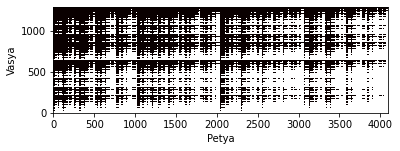

In [53]:
import matplotlib.pyplot as plt
plt.imshow(win_mask, cmap='hot', interpolation='nearest', origin='lower')
plt.ylabel('Vasya')
plt.xlabel('Petya')
plt.show()

In [54]:
win_mask.shape[0]*win_mask.shape[1]

5308416

In [55]:
win_mask.sum()

2891376

In [56]:
win_mask.sum()/(win_mask.shape[0]*win_mask.shape[1])

0.544677734375